# Problem Statement - BANK CUSTOMERS RETIREMENT PREDICTIONS

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You though that Support Vector Machines can be a great candidate to solve the problem. 

In [1]:
# Importing the Libraries

import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization

In [2]:
# Importing the Dataset

df = pd.read_csv('Bank_Customer_retirement.csv')

# Get the Column Names
print( df.keys() )

# Show First 5 Rows
df.head()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')


,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [3]:
# Get the Descriptive Statistics of the Data

df.describe()

,Customer ID,Age,401K Savings,Retire
count,500.000000,500.000000,500.000000,500.000000
mean,249.500000,46.757077,534984.465804,0.500000
std,144.481833,7.790125,187675.818881,0.500501
min,0.000000,25.000000,10.000000,0.000000
25%,124.750000,41.299451,382626.524425,0.000000
50%,249.500000,46.695770,534512.984350,0.500000
75%,374.250000,52.322551,680670.257025,1.000000
max,499.000000,70.000000,1000000.000000,1.000000


In [4]:
# Get the Informations from the Datasets

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Customer ID     500 non-null int64
Age             500 non-null float64
401K Savings    500 non-null float64
Retire          500 non-null int64
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


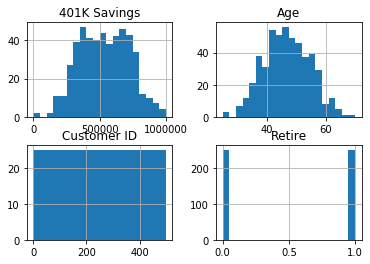

In [5]:
# Visualising the Data

# Plot an Overall Histogram
df.hist(bins=20);

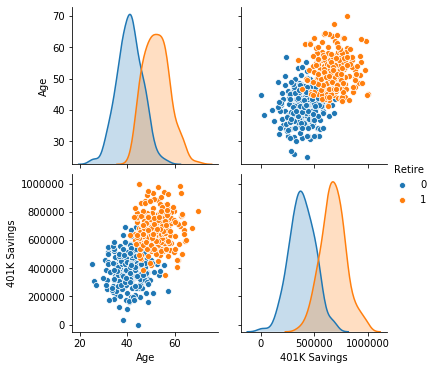

In [6]:
# Plot a PaitPlot

sns.pairplot(df, hue = 'Retire', vars = ['Age', '401K Savings'] );

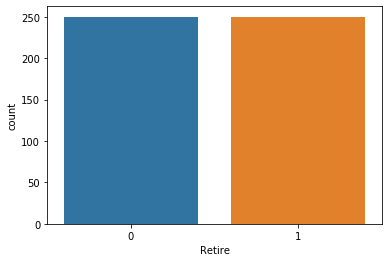

In [7]:
# Count the Occurrence of the Target

sns.countplot(df["Retire"]);

# They are Equally Distributed

In [8]:
# Data Modelling

X = df.drop(["Customer ID", "Retire"], axis= 1)
y = df["Retire"]

print("The Type of x is {} and the type of y is {}".format( type(X), type(y) ) )

The Type of x is <class 'pandas.core.frame.DataFrame'> and the type of y is <class 'pandas.core.series.Series'>


In [9]:
# Display Head of X and y

display(X.head(5), y.head(5))

# To Display Vertically 
from IPython.display import Javascript
Javascript('this.element.attr("style", "flex-direction: row;")')

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723


0    0
1    1
2    1
3    0
4    1
Name: Retire, dtype: int64

<IPython.core.display.Javascript object>

In [10]:
# Splitting the Model for Training

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

print("The Shape of X Train is {} and Shape of X Test is {}".format(X_train.shape, X_test.shape))
print("The Shape of y Train is {} and Shape of y Test is {}".format(y_train.shape, y_test.shape))

The Shape of X Train is (375, 2) and Shape of X Test is (125, 2)
The Shape of y Train is (375,) and Shape of y Test is (125,)


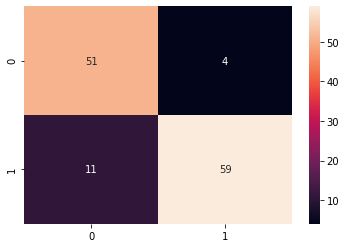

The Classification Report of the Model is:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        55
           1       0.94      0.84      0.89        70

    accuracy                           0.88       125
   macro avg       0.88      0.89      0.88       125
weighted avg       0.89      0.88      0.88       125



In [11]:
# Import SVC for Model Training

from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

# Fitting the Model
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Predicting the Model
y_predict = svc_model.predict(X_test)

# Plotting Confusion Matrix
sns.heatmap( confusion_matrix(y_test, y_predict), annot= True );
plt.show();

# Printing a classification Report
print("The Classification Report of the Model is:\n", classification_report(y_test, y_predict) )

In [12]:
# Model Optimization

# Applying Normalisation
# Feature Engineering - For Training Set

min_train = X_train.min()
max_train = X_train.max()
range_train = max_train - min_train

# Scale the Training Set
X_train_scaled = (X_train - min_train)/range_train

# Feature Engineering - For Test Set

min_test = X_test.min()
max_test = X_test.max()
range_test = max_test - min_test

# Scale the Training Set
X_test_scaled = (X_test - min_test)/range_test

In [13]:
# Display Head of X_train_scaled and X_test_scaled

display(X_train_scaled.head(5), X_test_scaled.head(5))

# To Display Vertically 
from IPython.display import Javascript
Javascript('this.element.attr("style", "flex-direction: row;")')

,Age,401K Savings
227,0.529248,0.536252
417,0.582942,0.375672
203,0.137994,0.388346
126,0.362492,0.631958
329,0.658225,0.538868


,Age,401K Savings
361,0.959022,0.412289
73,0.217604,0.130493
374,1.000000,1.000000
155,0.611700,0.305478
104,0.156427,0.153191


<IPython.core.display.Javascript object>

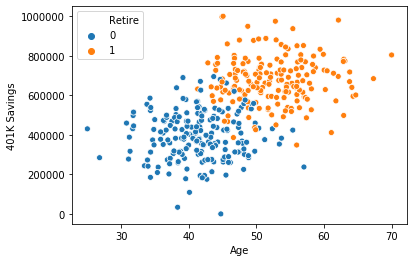

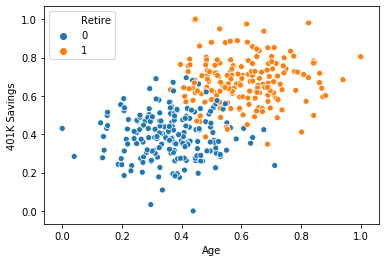

In [14]:
# Validate the Plots before and After Feature Scaling

# Before Normalisation
sns.scatterplot(x = X_train['Age'], y = X_train['401K Savings'], hue = y_train)
plt.show();

# After Normalisation
sns.scatterplot(x = X_train_scaled['Age'], y = X_train_scaled['401K Savings'], hue = y_train)
plt.show();

# Both Plots are same, So Our Normalisation is a Success

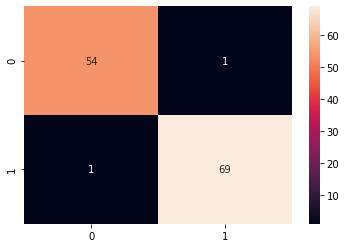

The Classification Report of the Model is:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        70

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125



In [15]:
# Modelling the Normalised DataSet and Making Predictions

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

# Predicting the Model
y_predict = svc_model.predict(X_test_scaled)

# Plotting Confusion Matrix
sns.heatmap( confusion_matrix(y_test, y_predict), annot= True );
plt.show();

# Printing a classification Report
print("The Classification Report of the Model is:\n", classification_report(y_test, y_predict) )

In [16]:
# Can we still improve the Model More ?

# Use Grid Search GV to get the Best Parameters
from sklearn.model_selection import GridSearchCV


# Modelling via GridSearch CV

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly','linear']} 
grid = GridSearchCV(estimator= SVC(), param_grid= param_grid,refit=True,verbose=4)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.01, gamma=1, kernel=poly ....................................
[CV] ........ C=0.01, gamma=1, kernel=poly, score=0.627, total=   0.0s
[CV] C=0.01, gamma=1, kernel=poly ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.01, gamma=0.01, kernel=poly, score=0.520, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.01, gamma=0.01, kernel=linear, score=0.520, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.01, gamma=0.01, kernel=linear, score=0.520, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.01, gamma=0.01, kernel=linear, score=0.520, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.01, gamma=0.01, kernel=linear, score=0.520, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.01, gamma=0.01, kernel=linear, score=0.520, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] ..... C=0.01, gamma=0.001, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] .

[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.907, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.907, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.920, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.960, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.947, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.920, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.933, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] .

[CV] ........ C=10, gamma=0.1, kernel=poly, score=0.587, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ........ C=10, gamma=0.1, kernel=poly, score=0.560, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.907, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.933, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.960, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.947, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.920, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[CV] ... C=100, gamma=0.001, kernel=linear, score=0.907, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.920, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.960, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.947, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.920, total=   0.0s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [17]:
# Print out the Best Parameters & Estimators

print("The Best Parameters is:\n", grid.best_params_)
print("\nThe Best Model Estimators are:\n", grid.best_estimator_)

The Best Parameters is:
 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

The Best Model Estimators are:
 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


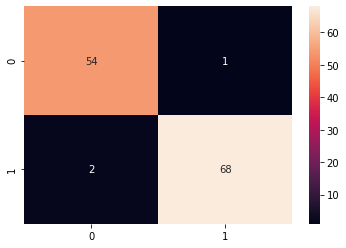

The Classification Report is: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.97      0.98        70

    accuracy                           0.98       125
   macro avg       0.97      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125



In [18]:
# Predict the Model

grid_predictions = grid.predict(X_test_scaled)

# Plot Confusion Matrix
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot= True)
plt.show();

# Print the Classification Report
print("The Classification Report is: \n", classification_report(y_test,grid_predictions))

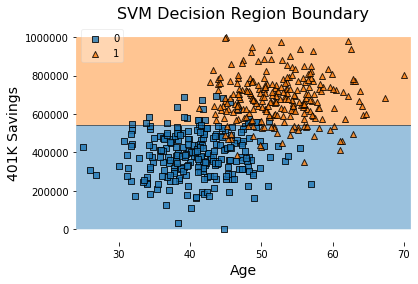

In [29]:
# Plotting a Base Decision Boundary

from mlxtend.plotting import plot_decision_regions


clf = SVC(decision_function_shape='ovo', degree=4, kernel='rbf')
clf.fit(X.values, y.values) 

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16);

https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html